In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime
import geopandas as gpd
import shapely.wkt
from matplotlib.colors import LinearSegmentedColormap

c:\Users\102140\Anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
dpto_indec = pd.read_csv("Data/departamento_indec.csv")
dpto_indec = dpto_indec.rename(columns={'provincia': 'Provincia'})
dpto_indec

,WKT,departamen,Provincia
0,"MULTIPOLYGON (((-58.37501411 -34.57958726,-58....",Comuna 1,Ciudad Autónoma de Buenos Aires
1,"MULTIPOLYGON (((-58.40084119 -34.57125986,-58....",Comuna 2,Ciudad Autónoma de Buenos Aires
2,"MULTIPOLYGON (((-58.39364982 -34.60154212,-58....",Comuna 3,Ciudad Autónoma de Buenos Aires
3,"MULTIPOLYGON (((-58.35694632 -34.61979926,-58....",Comuna 4,Ciudad Autónoma de Buenos Aires
4,"MULTIPOLYGON (((-58.01701654 -34.78119812,-58....",Berazategui,Buenos Aires
...,...,...,...
522,"MULTIPOLYGON (((-65.54407375 -26.09088609,-65....",Trancas,Tucumán
523,"MULTIPOLYGON (((-65.25443343 -26.78507581,-65....",Yerba Buena,Tucumán
524,"MULTIPOLYGON (((-68.60577254 -54.5512346,-68.6...",Río Grande,Tierra del Fuego
525,"MULTIPOLYGON (((-67.37726944 -54.91089295,-67....",Ushuaia,Tierra del Fuego


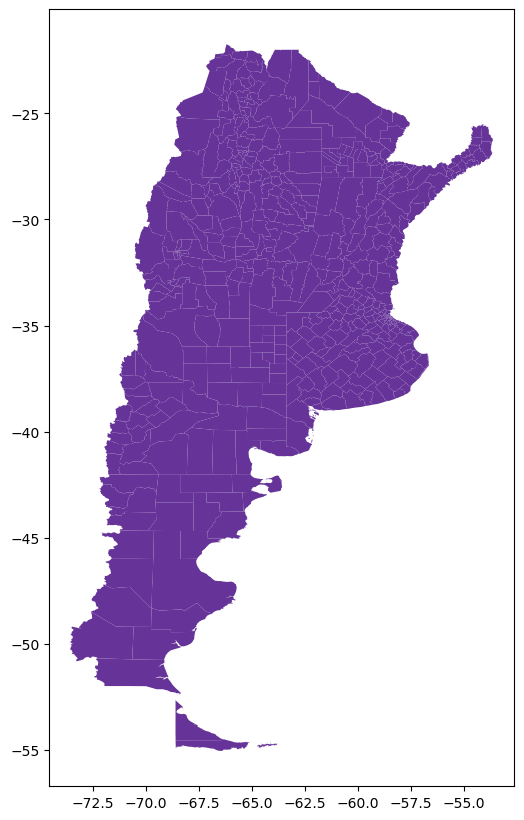

In [107]:
dpto_indec["WKT"] = dpto_indec["WKT"].apply(shapely.wkt.loads) 
geo_dpto_indec = gpd.GeoDataFrame(dpto_indec, geometry='WKT')
geo_dpto_indec=geo_dpto_indec.loc[(geo_dpto_indec.departamen != 'Antártida Argentina') &
                                  (geo_dpto_indec.departamen != 'Islas del Atlántico Sur')] 
geo_dpto_indec.plot(color='rebeccapurple', figsize=(6,12))

In [3]:
data_risks = pd.read_csv("Data/ArgentinaRisks.csv", delimiter=';')
data_risks

,Provincia,Earthquake,Wildfire,Volcano,Flood,Landslide,Drought,Extreme Temperature,Multi-Hazard Risk,Resilience,Multi-Hazard Exposure
0,Formosa,0,"0,362",0,"0,448","0,001","0,227",0,"0,492","0,385","0,247"
1,Ciudad Autonoma Buenos Aires,0,"0,293",0,"0,146","0,187","0,292","0,292","0,491","0,69","0,854"
2,Buenos Aires,0,"0,326",0,"0,401","0,327","0,545","0,545","0,664","0,454","0,901"
3,Misiones,0,"0,389",0,"0,08","0,037","0,527",0,"0,543","0,421","0,47"
4,Tucuman,0,"0,418",0,"0,196","0,344","0,508","0,44","0,612","0,448","0,734"
5,Entre Rios,0,"0,314",0,"0,234","0,109","0,497","0,417","0,571","0,455","0,622"
6,Mendoza,"0,551","0,287","0,5","0,125","0,273","0,169",0,"0,55","0,435","0,519"
7,Chaco,"0,063","0,557",0,"0,532","0,17","0,545",0,"0,605","0,389","0,592"
8,Cordoba,"0,052","0,213",0,"0,272","0,288","0,464","0,464","0,584","0,509","0,771"
9,Corrientes,0,"0,312",0,"0,193","0,05","0,514",0,"0,528","0,432","0,446"


In [99]:
for columna in data_risks.iloc[:, 1:].columns:
    data_risks[columna] = data_risks[columna].str.replace(",", ".").astype(float)


In [102]:
Dic = {' Ciudad Autonoma Buenos Aires':'Ciudad Autónoma de Buenos Aires', 'Buenos Aires': 'Buenos Aires', ' San Luis': 'San Luis', ' Chaco':'Chaco', ' Chubut':'Chubut', ' Entre Rios':'Entre Ríos', ' La Pampa': 'La Pampa', 'Formosa': 'Formosa', ' Cordoba': 'Córdoba',
       ' Catamarca':'Catamarca', ' Corrientes': 'Corrientes', ' Jujuy':'Jujuy', ' La Rioja': 'La Rioja', ' Mendoza':'Mendoza', ' Rio Negro':'Río Negro', ' Salta':'Salta', ' San Juan': 'San Juan', ' Misiones': 'Misiones', ' Neuquen': 'Neuquén',
       ' Santiago del Estero': 'Santiago del Estero', ' Tucuman': 'Tucumán', ' Tierra del Fuego': 'Tierra del Fuego', ' Santa Cruz': 'Santa Cruz', ' Santa Fe': 'Santa Fe'}

In [103]:
data_risks = data_risks.replace(Dic)

In [25]:
data_risks_delincuencia = pd.read_csv("Data/snic-provincias.csv", delimiter=',')
data_risks_delincuencia = data_risks_delincuencia.rename(columns={'provincia_nombre': 'Provincia'})
Dic1 = {'Tierra del Fuego, Antártida e Islas del Atlántico Sur': 'Tierra del Fuego'}
data_risks_delincuencia = data_risks_delincuencia.replace(Dic1)
data_risks_delincuencia

,anio,provincia_id,Provincia,codigo_delito_snic_id,codigo_delito_snic_nombre,cantidad_hechos,cantidad_victimas
0,2014,2,Ciudad Autónoma de Buenos Aires,1,Homicidios dolosos,185,200.0
1,2014,2,Ciudad Autónoma de Buenos Aires,2,Homicidios dolosos en grado de tentativa,54,68.0
2,2014,2,Ciudad Autónoma de Buenos Aires,3,Muertes en Accidentes Viales,82,102.0
3,2014,2,Ciudad Autónoma de Buenos Aires,4,Homicidios culposos por otros hechos,23,24.0
4,2014,2,Ciudad Autónoma de Buenos Aires,5,Lesiones dolosas,18679,21175.0
...,...,...,...,...,...,...,...
10219,2022,94,Tierra del Fuego,29_7,Contrabando de elementos nucleares agresivos q...,0,NaN
10220,2022,94,Tierra del Fuego,29_8,Otros delitos previstos en leyes especiales,3082,NaN
10221,2022,94,Tierra del Fuego,30,Contravenciones,557,NaN
10222,2022,94,Tierra del Fuego,31,Suicidios (consumados),22,22.0


In [27]:
data_risks_delincuencia['codigo_delito_snic_nombre'].to_list()

['Homicidios dolosos',
 'Homicidios dolosos en grado de tentativa',
 'Muertes en Accidentes Viales',
 'Homicidios culposos por otros hechos',
 'Lesiones dolosas',
 'Lesiones culposas en Accidentes Viales',
 'Lesiones culposas por otros hechos',
 'Otros delitos contra las personas',
 'Delitos contra el honor',
 'Violaciones',
 'Otros delitos contra la integridad sexual',
 'Delitos contra el estado civil',
 'Amenazas',
 'Otros delitos contra la libertad',
 'Robos (excluye los agravados por el resultado de lesiones y/o muertes)',
 'Tentativas de robo (excluye las agravadas por el res. de lesiones y/o muerte)',
 'Robos agravados por el resultado de lesiones y/o muertes ',
 'Tentativas de robo agravado por el resultado de lesiones y/o muertes',
 'Hurtos',
 'Tentativas de hurto',
 'Otros delitos contra la propiedad',
 'Delitos contra la seguridad pública',
 'Delitos contra el orden público',
 'Delitos contra la seguridad de la nación',
 'Delitos contra los poderes públicos y el orden constit

In [5]:
Mask1 = data_risks_delincuencia['anio'] == 2022
data_risks_delincuencia_2022 = data_risks_delincuencia.loc[Mask1]
data_risks_delincuencia_2022

,anio,provincia_id,Provincia,codigo_delito_snic_id,codigo_delito_snic_nombre,cantidad_hechos,cantidad_victimas
8880,2022,2,Ciudad Autónoma de Buenos Aires,1,Homicidios dolosos,87,89.0
8881,2022,2,Ciudad Autónoma de Buenos Aires,2,Homicidios dolosos en grado de tentativa,102,115.0
8882,2022,2,Ciudad Autónoma de Buenos Aires,3,Muertes en Accidentes Viales,107,111.0
8883,2022,2,Ciudad Autónoma de Buenos Aires,4,Homicidios culposos por otros hechos,72,72.0
8884,2022,2,Ciudad Autónoma de Buenos Aires,5,Lesiones dolosas,10204,11023.0
...,...,...,...,...,...,...,...
10219,2022,94,Tierra del Fuego,29_7,Contrabando de elementos nucleares agresivos q...,0,NaN
10220,2022,94,Tierra del Fuego,29_8,Otros delitos previstos en leyes especiales,3082,NaN
10221,2022,94,Tierra del Fuego,30,Contravenciones,557,NaN
10222,2022,94,Tierra del Fuego,31,Suicidios (consumados),22,22.0


In [16]:
data_risks_delincuencia_2022.sort_values(by='codigo_delito_snic_nombre', key=lambda col: col.str.startswith("Robos"), ascending=False)

,anio,provincia_id,Provincia,codigo_delito_snic_id,codigo_delito_snic_nombre,cantidad_hechos,cantidad_victimas
9234,2022,26,Chubut,17,Robos agravados por el resultado de lesiones y...,164,NaN
9176,2022,22,Chaco,15,Robos (excluye los agravados por el resultado ...,4112,NaN
9794,2022,66,Salta,17,Robos agravados por el resultado de lesiones y...,16,NaN
10128,2022,90,Tucumán,15,Robos (excluye los agravados por el resultado ...,22359,NaN
10130,2022,90,Tucumán,17,Robos agravados por el resultado de lesiones y...,9,NaN
...,...,...,...,...,...,...,...
9335,2022,34,Formosa,8,Otros delitos contra las personas,97,105.0
9334,2022,34,Formosa,7,Lesiones culposas por otros hechos,3,3.0
9333,2022,34,Formosa,6,Lesiones culposas en Accidentes Viales,848,1022.0
9332,2022,34,Formosa,5,Lesiones dolosas,3018,3466.0


In [17]:
data_risks_delincuencia_2022 = data_risks_delincuencia_2022.assign(starts_with_robo=data_risks_delincuencia_2022['codigo_delito_snic_nombre'].str.startswith('Robo'))

data_risks_delincuencia_2022 = data_risks_delincuencia_2022.sort_values(by=['starts_with_robo', 'codigo_delito_snic_nombre'])

In [24]:
data_risks_delincuencia_2022[data_risks_delincuencia_2022['starts_with_robo'] == True]

,anio,provincia_id,Provincia,codigo_delito_snic_id,codigo_delito_snic_nombre,cantidad_hechos,cantidad_victimas,starts_with_robo
8896,2022,2,Ciudad Autónoma de Buenos Aires,15,Robos (excluye los agravados por el resultado ...,55163,NaN,True
8952,2022,6,Buenos Aires,15,Robos (excluye los agravados por el resultado ...,95754,NaN,True
9008,2022,10,Catamarca,15,Robos (excluye los agravados por el resultado ...,4172,NaN,True
9064,2022,14,Córdoba,15,Robos (excluye los agravados por el resultado ...,51907,NaN,True
9120,2022,18,Corrientes,15,Robos (excluye los agravados por el resultado ...,6003,NaN,True
9176,2022,22,Chaco,15,Robos (excluye los agravados por el resultado ...,4112,NaN,True
9232,2022,26,Chubut,15,Robos (excluye los agravados por el resultado ...,3911,NaN,True
9288,2022,30,Entre Ríos,15,Robos (excluye los agravados por el resultado ...,8040,NaN,True
9344,2022,34,Formosa,15,Robos (excluye los agravados por el resultado ...,2825,NaN,True
9400,2022,38,Jujuy,15,Robos (excluye los agravados por el resultado ...,4602,NaN,True


In [7]:
df_encoded = pd.get_dummies(data_risks_delincuencia_2022, prefix = 'Delito', columns=['codigo_delito_snic_nombre'])
df_encoded

,anio,provincia_id,Provincia,codigo_delito_snic_id,cantidad_hechos,cantidad_victimas,Delito_Acopio y fabricación ilegal de armas piezas y municiones,Delito_Amenazas,Delito_Comercialización y entrega de estupefacientes,Delito_Confabulación de estupefacientes,...,Delito_Tenencia ilegal de armas de fuego,Delito_Tenencia o entrega atenuada de estupefacientes,Delito_Tenencia simple atenuada para uso personal de estupefacientes,Delito_Tenencia simple de estupefacientes,Delito_Tentativas de hurto,Delito_Tentativas de robo (excluye las agravadas por el res. de lesiones y/o muerte),Delito_Tentativas de robo agravado por el resultado de lesiones y/o muertes,Delito_Trata de personas agravado,Delito_Trata de personas simple,Delito_Violaciones
8880,2022,2,Ciudad Autónoma de Buenos Aires,1,87,89.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8881,2022,2,Ciudad Autónoma de Buenos Aires,2,102,115.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8882,2022,2,Ciudad Autónoma de Buenos Aires,3,107,111.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8883,2022,2,Ciudad Autónoma de Buenos Aires,4,72,72.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8884,2022,2,Ciudad Autónoma de Buenos Aires,5,10204,11023.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10219,2022,94,Tierra del Fuego,29_7,0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10220,2022,94,Tierra del Fuego,29_8,3082,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10221,2022,94,Tierra del Fuego,30,557,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10222,2022,94,Tierra del Fuego,31,22,22.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data_risks_delincuencia_2022['codigo_delito_snic_nombre'].value_counts()

Homicidios dolosos                                                                              24
Homicidios dolosos en grado de tentativa                                                        24
Delitos contra el orden público                                                                 24
Delitos contra la seguridad de la nación                                                        24
Delitos contra los poderes públicos y el orden constitucional                                   24
Delitos contra la administración pública                                                        24
Delitos contra la fe pública                                                                    24
Siembra y producción de estupefacientes                                                         24
Comercialización y entrega de estupefacientes                                                   24
Tenencia o entrega atenuada de estupefacientes                                                  24
Desvío de 

In [131]:
resultado_suma_delicuencia = data_risks_delincuencia_2022.groupby('Provincia')['cantidad_hechos'].sum()
resultado_suma_delicuencia_df = resultado_suma_delicuencia.reset_index()
resultado_suma_delicuencia_df

,Provincia,cantidad_hechos
0,Buenos Aires,523534
1,Catamarca,22627
2,Chaco,29338
3,Chubut,24821
4,Ciudad Autónoma de Buenos Aires,199007
5,Corrientes,26721
6,Córdoba,174417
7,Entre Ríos,48476
8,Formosa,26071
9,Jujuy,43080


In [150]:
data_personas = pd.read_csv("Data/personas.csv")

In [160]:
data_personas.replace({'Capital Federal': 'Ciudad Autonoma Buenos Aires'}, inplace=True)
data_personas['PROVINCIA'].dropna(inplace=True)
resultado_personas = data_personas.groupby('PROVINCIA')['KEY_CLIENT'].count()
Personas_mapa = resultado_personas.reset_index()
Personas_mapa

In [164]:
Dic2 = {'Ciudad Autonoma Buenos Aires': 'Ciudad Autónoma de Buenos Aires', 'Tucuman':'Tucumán', 'Cordoba':'Córdoba', 'Entre Rios': 'Entre Ríos', 'Neuquen': 'Neuquén', 'Rio Negro':'Río Negro'}
Personas_mapa = Personas_mapa.replace(Dic2)

In [165]:
Personas_mapa = Personas_mapa.rename(columns={'PROVINCIA': 'Provincia'})
merged_df_personas = merged_df.merge(Personas_mapa, on="Provincia", how="left")
merged_df_personas

,WKT,departamen,Provincia,Earthquake,Wildfire,Volcano,Flood,Landslide,Drought,Extreme Temperature,Multi-Hazard Risk,Resilience,Multi-Hazard Exposure,KEY_CLIENT
0,"MULTIPOLYGON (((-58.37501 -34.57959, -58.36690...",Comuna 1,Ciudad Autónoma de Buenos Aires,0.000,0.293,0.0,0.146,0.187,0.292,0.292,0.491,0.690,0.854,17619
1,"MULTIPOLYGON (((-58.40084 -34.57126, -58.40005...",Comuna 2,Ciudad Autónoma de Buenos Aires,0.000,0.293,0.0,0.146,0.187,0.292,0.292,0.491,0.690,0.854,17619
2,"MULTIPOLYGON (((-58.39365 -34.60154, -58.39348...",Comuna 3,Ciudad Autónoma de Buenos Aires,0.000,0.293,0.0,0.146,0.187,0.292,0.292,0.491,0.690,0.854,17619
3,"MULTIPOLYGON (((-58.35695 -34.61980, -58.35672...",Comuna 4,Ciudad Autónoma de Buenos Aires,0.000,0.293,0.0,0.146,0.187,0.292,0.292,0.491,0.690,0.854,17619
4,"MULTIPOLYGON (((-58.01702 -34.78120, -58.08380...",Berazategui,Buenos Aires,0.000,0.326,0.0,0.401,0.327,0.545,0.545,0.664,0.454,0.901,32220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,"MULTIPOLYGON (((-65.71564 -26.51466, -65.71181...",Tafí Viejo,Tucumán,0.000,0.418,0.0,0.196,0.344,0.508,0.440,0.612,0.448,0.734,2045
521,"MULTIPOLYGON (((-65.54407 -26.09089, -65.54315...",Trancas,Tucumán,0.000,0.418,0.0,0.196,0.344,0.508,0.440,0.612,0.448,0.734,2045
522,"MULTIPOLYGON (((-65.25443 -26.78508, -65.25646...",Yerba Buena,Tucumán,0.000,0.418,0.0,0.196,0.344,0.508,0.440,0.612,0.448,0.734,2045
523,"MULTIPOLYGON (((-68.60577 -54.55123, -68.60480...",Río Grande,Tierra del Fuego,0.413,0.100,0.0,0.000,0.049,0.000,0.000,0.390,0.542,0.253,820


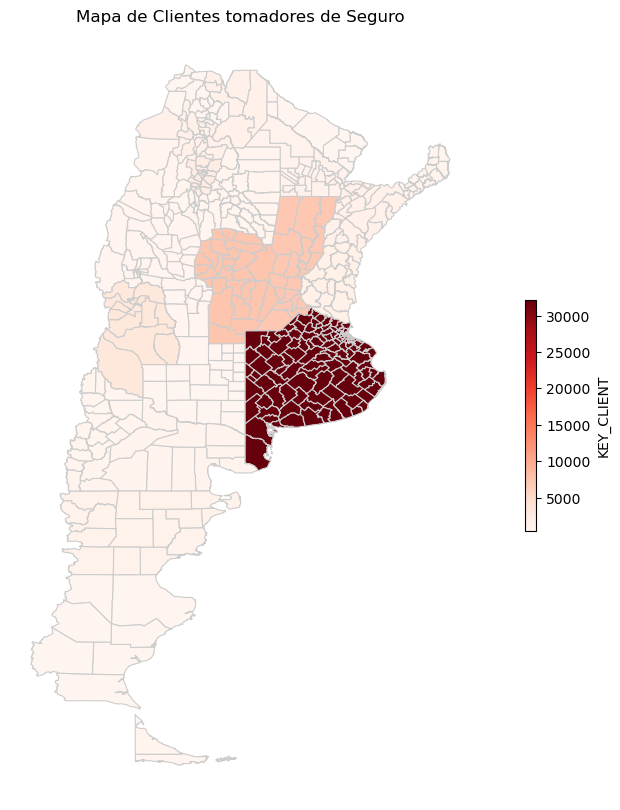

In [166]:
cmap_red = sns.color_palette("Reds", as_cmap=True, n_colors=4)

fig, ax = plt.subplots(1, 1, figsize=(14, 10))
merged_df_personas.plot(column="KEY_CLIENT", cmap=cmap_red, linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)

sm = plt.cm.ScalarMappable(cmap=cmap_red, norm=plt.Normalize(vmin=merged_df_personas["KEY_CLIENT"].min(), vmax=merged_df_personas["KEY_CLIENT"].max()))
sm.set_array([])
plt.colorbar(sm, label="KEY_CLIENT", ax=ax, shrink=0.3)

plt.title("Mapa de Clientes tomadores de Seguro")
plt.axis("off") 
plt.show()


In [132]:
merged_df_delincuencoa = merged_df.merge(resultado_suma_delicuencia_df, on="Provincia", how="left")
merged_df_delincuencoa

,WKT,departamen,Provincia,Earthquake,Wildfire,Volcano,Flood,Landslide,Drought,Extreme Temperature,Multi-Hazard Risk,Resilience,Multi-Hazard Exposure,cantidad_hechos
0,"MULTIPOLYGON (((-58.37501 -34.57959, -58.36690...",Comuna 1,Ciudad Autónoma de Buenos Aires,0.000,0.293,0.0,0.146,0.187,0.292,0.292,0.491,0.690,0.854,199007
1,"MULTIPOLYGON (((-58.40084 -34.57126, -58.40005...",Comuna 2,Ciudad Autónoma de Buenos Aires,0.000,0.293,0.0,0.146,0.187,0.292,0.292,0.491,0.690,0.854,199007
2,"MULTIPOLYGON (((-58.39365 -34.60154, -58.39348...",Comuna 3,Ciudad Autónoma de Buenos Aires,0.000,0.293,0.0,0.146,0.187,0.292,0.292,0.491,0.690,0.854,199007
3,"MULTIPOLYGON (((-58.35695 -34.61980, -58.35672...",Comuna 4,Ciudad Autónoma de Buenos Aires,0.000,0.293,0.0,0.146,0.187,0.292,0.292,0.491,0.690,0.854,199007
4,"MULTIPOLYGON (((-58.01702 -34.78120, -58.08380...",Berazategui,Buenos Aires,0.000,0.326,0.0,0.401,0.327,0.545,0.545,0.664,0.454,0.901,523534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,"MULTIPOLYGON (((-65.71564 -26.51466, -65.71181...",Tafí Viejo,Tucumán,0.000,0.418,0.0,0.196,0.344,0.508,0.440,0.612,0.448,0.734,88618
521,"MULTIPOLYGON (((-65.54407 -26.09089, -65.54315...",Trancas,Tucumán,0.000,0.418,0.0,0.196,0.344,0.508,0.440,0.612,0.448,0.734,88618
522,"MULTIPOLYGON (((-65.25443 -26.78508, -65.25646...",Yerba Buena,Tucumán,0.000,0.418,0.0,0.196,0.344,0.508,0.440,0.612,0.448,0.734,88618
523,"MULTIPOLYGON (((-68.60577 -54.55123, -68.60480...",Río Grande,Tierra del Fuego,0.413,0.100,0.0,0.000,0.049,0.000,0.000,0.390,0.542,0.253,11583


In [126]:
pd.get_dummies(data_risks_delincuencia_2022['codigo_delito_snic_nombre'])

,Acopio y fabricación ilegal de armas piezas y municiones,Amenazas,Comercialización y entrega de estupefacientes,Confabulación de estupefacientes,Contrabando Agravado,Contrabando Simple,Contrabando de elementos nucleares agresivos químicos armas y municiones,Contrabando de estupefacientes,Contravenciones,Delitos contra el estado civil,...,Tenencia ilegal de armas de fuego,Tenencia o entrega atenuada de estupefacientes,Tenencia simple atenuada para uso personal de estupefacientes,Tenencia simple de estupefacientes,Tentativas de hurto,Tentativas de robo (excluye las agravadas por el res. de lesiones y/o muerte),Tentativas de robo agravado por el resultado de lesiones y/o muertes,Trata de personas agravado,Trata de personas simple,Violaciones
8880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8881,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10219,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10221,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
merged_df = geo_dpto_indec.merge(data_risks, on="Provincia", how="left")
merged_df

,WKT,departamen,Provincia,Earthquake,Wildfire,Volcano,Flood,Landslide,Drought,Extreme Temperature,Multi-Hazard Risk,Resilience,Multi-Hazard Exposure
0,"MULTIPOLYGON (((-58.37501 -34.57959, -58.36690...",Comuna 1,Ciudad Autónoma de Buenos Aires,0.000,0.293,0.0,0.146,0.187,0.292,0.292,0.491,0.690,0.854
1,"MULTIPOLYGON (((-58.40084 -34.57126, -58.40005...",Comuna 2,Ciudad Autónoma de Buenos Aires,0.000,0.293,0.0,0.146,0.187,0.292,0.292,0.491,0.690,0.854
2,"MULTIPOLYGON (((-58.39365 -34.60154, -58.39348...",Comuna 3,Ciudad Autónoma de Buenos Aires,0.000,0.293,0.0,0.146,0.187,0.292,0.292,0.491,0.690,0.854
3,"MULTIPOLYGON (((-58.35695 -34.61980, -58.35672...",Comuna 4,Ciudad Autónoma de Buenos Aires,0.000,0.293,0.0,0.146,0.187,0.292,0.292,0.491,0.690,0.854
4,"MULTIPOLYGON (((-58.01702 -34.78120, -58.08380...",Berazategui,Buenos Aires,0.000,0.326,0.0,0.401,0.327,0.545,0.545,0.664,0.454,0.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,"MULTIPOLYGON (((-65.71564 -26.51466, -65.71181...",Tafí Viejo,Tucumán,0.000,0.418,0.0,0.196,0.344,0.508,0.440,0.612,0.448,0.734
521,"MULTIPOLYGON (((-65.54407 -26.09089, -65.54315...",Trancas,Tucumán,0.000,0.418,0.0,0.196,0.344,0.508,0.440,0.612,0.448,0.734
522,"MULTIPOLYGON (((-65.25443 -26.78508, -65.25646...",Yerba Buena,Tucumán,0.000,0.418,0.0,0.196,0.344,0.508,0.440,0.612,0.448,0.734
523,"MULTIPOLYGON (((-68.60577 -54.55123, -68.60480...",Río Grande,Tierra del Fuego,0.413,0.100,0.0,0.000,0.049,0.000,0.000,0.390,0.542,0.253


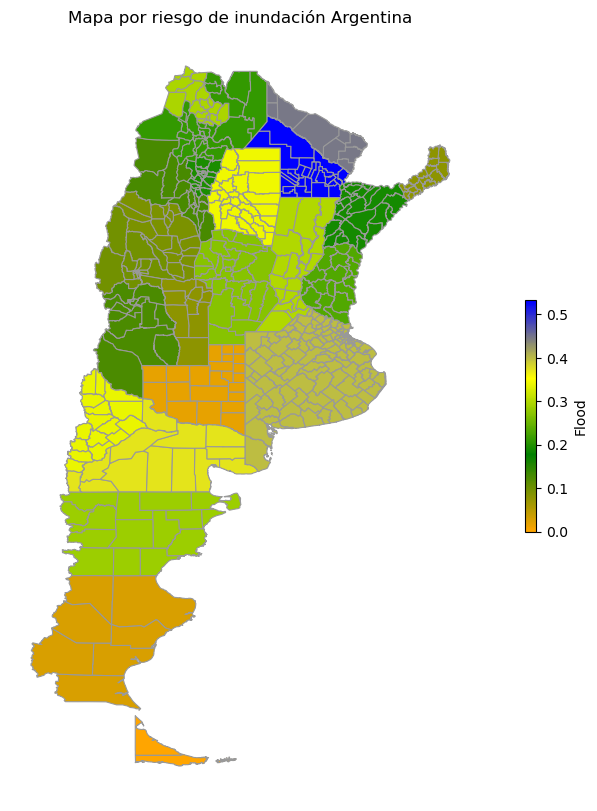

In [134]:
cmap = LinearSegmentedColormap.from_list("custom_colormap", ["orange", "green", "yellow", "blue"])

fig, ax = plt.subplots(1, 1, figsize=(14, 10))
merged_df.plot(column="Flood", cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.6', legend=False)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=merged_df["Flood"].min(), vmax=merged_df["Flood"].max()))
sm.set_array([])
plt.colorbar(sm, label="Flood", ax=ax, shrink=0.3)

plt.title("Mapa por riesgo de inundación Argentina")
plt.axis("off") 
plt.show()
